In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Detector Cells

In [14]:
cells = pd.read_csv("./data/20240806-detector-cells-data.csv")
cells.head()


,well,condition,timepoint,fluorescence [AU],tetR [nM],aTc [nM],DNA [nM],cell_ID_within_well,cell_area,cell_perimeter,cell_axis_major_length,cell_axis_minor_length
0,F11,positive,0,616.568480,0.0,0,0.5,4297,786,108.911688,40.282645,25.244045
1,F11,positive,0,527.468137,0.0,0,0.5,4422,575,92.083261,32.233444,23.224851
2,F11,positive,0,432.473580,0.0,0,0.5,1517,1936,196.066017,61.550863,46.755186
3,F11,positive,0,362.899801,0.0,0,0.5,223,1303,155.639610,61.455752,28.387717
4,F11,positive,0,559.009804,0.0,0,0.5,4518,937,113.154329,38.503535,31.352462


## Mean Intensity Traces

/var/folders/wr/cby0172x24d_6b7kwlbjy44r0000gn/T/ipykernel_4833/2862397345.py:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(


<Axes: xlabel='timepoint', ylabel='fluorescence [AU]'>

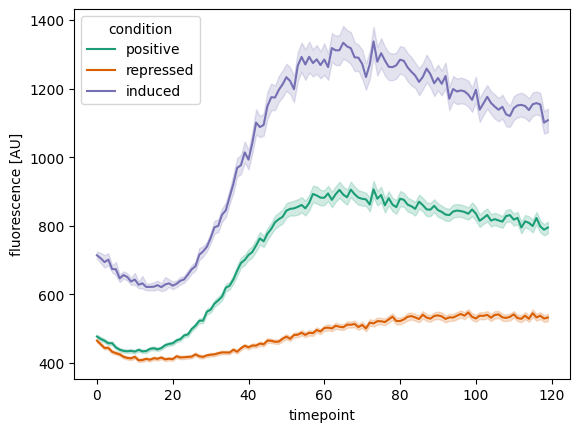

In [6]:
sns.lineplot(
    data=cells,
    x="timepoint",
    y="fluorescence [AU]",
    hue="condition",
    palette=sns.color_palette("Dark2"),
)

## Fog Plot

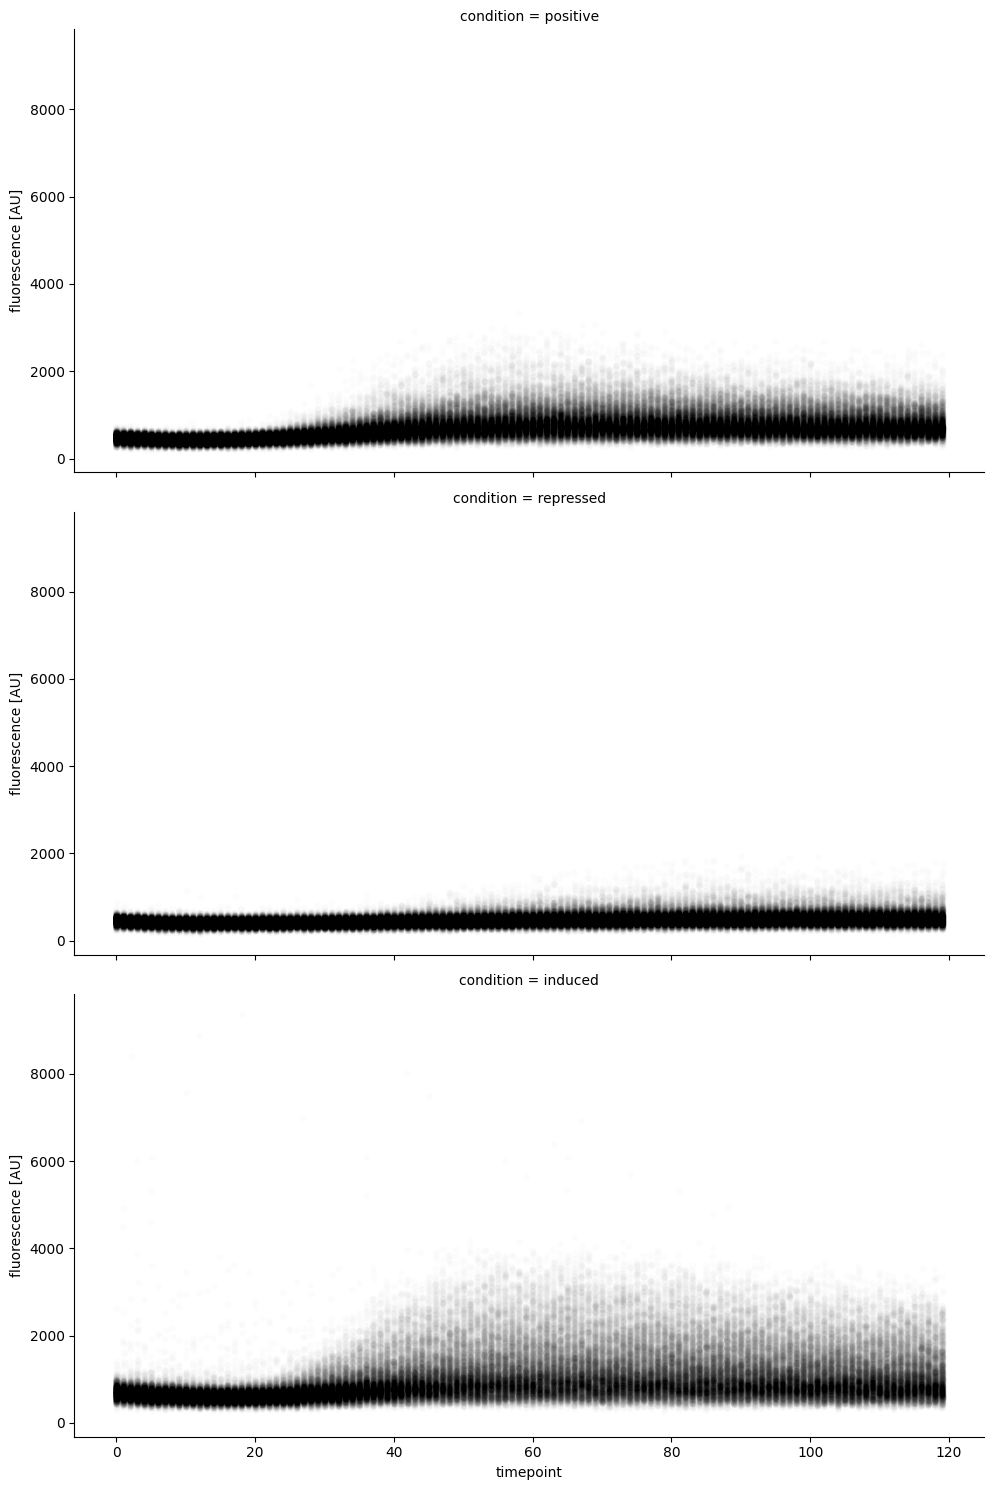

In [7]:
sns.catplot(
    data=cells,
    x="timepoint",
    y="fluorescence [AU]",
    color="black",
    row="condition",
    kind="strip",
    alpha=0.01,
    jitter=True,
    aspect=2,
    sharey=True,
    native_scale=True
)

# Discovery Plate

In [8]:
discovery = pd.read_csv("data/20240714-discovery-data.csv")
discovery.head()

,timepoint,well,condition,condition_tag,Mg++ [mM],T7RNAP [ng/uL],ribosome [uM],DNA [nM],energy_mix,protein_mix,fluorescence [AU],background_fluorescence [AU],background_subtracted_fluorescence [AU],row,column
0,1,A:1,exp,exp,4.0,2.5,1.8,35,b.next eng mix,b.next prot mix dT7RNAP 03-1,1439670,1589516.5,-149846.5,A,1
1,1,A:3,exp,exp,6.0,2.5,1.8,35,b.next eng mix,b.next prot mix dT7RNAP 03-1,1417341,1589516.5,-172175.5,A,3
2,1,A:5,exp,exp,8.0,2.5,1.8,35,b.next eng mix,b.next prot mix dT7RNAP 03-1,1520837,1589516.5,-68679.5,A,5
3,1,A:7,exp,exp,10.0,2.5,1.8,35,b.next eng mix,b.next prot mix dT7RNAP 03-1,1551417,1589516.5,-38099.5,A,7
4,1,A:9,exp,exp,12.0,2.5,1.8,35,b.next eng mix,b.next prot mix dT7RNAP 03-1,1526917,1589516.5,-62599.5,A,9


## Data Summary

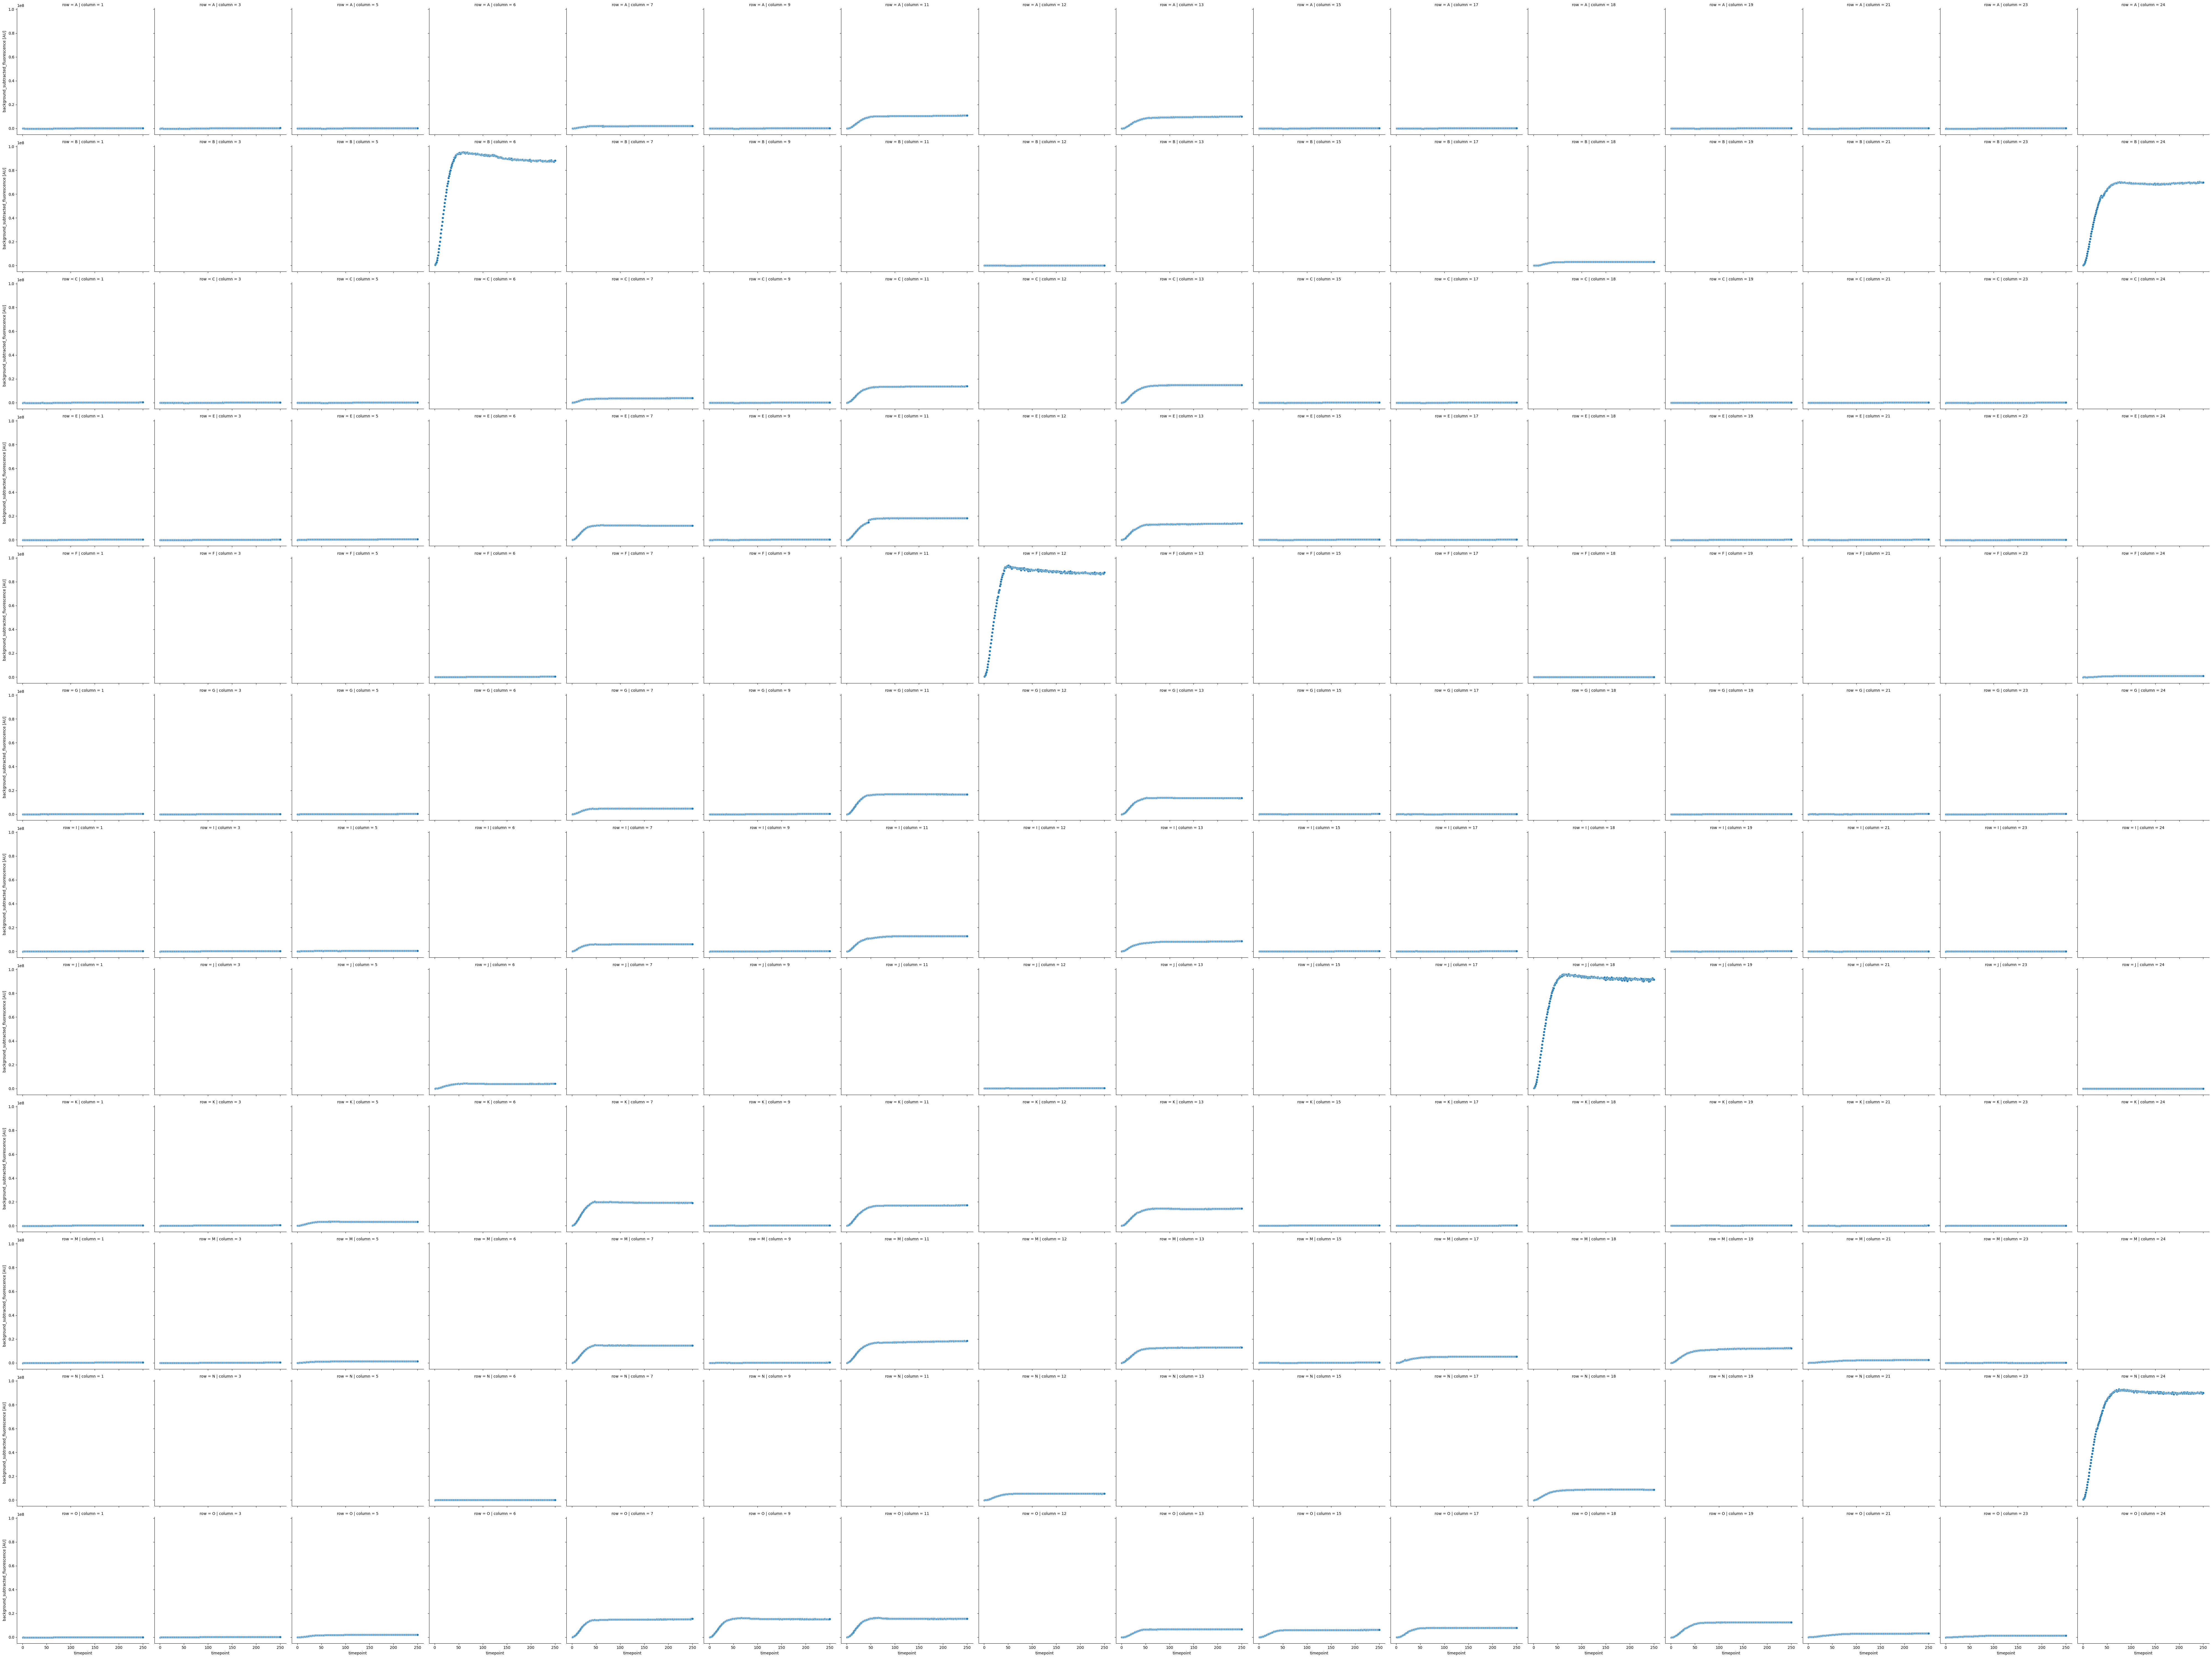

In [9]:
g = sns.relplot(
    data=discovery,
    x="timepoint", 
    y="background_subtracted_fluorescence [AU]",
    row="row",
    col="column",
)

## Transcription: [T7RNAP] vs [Mg++]

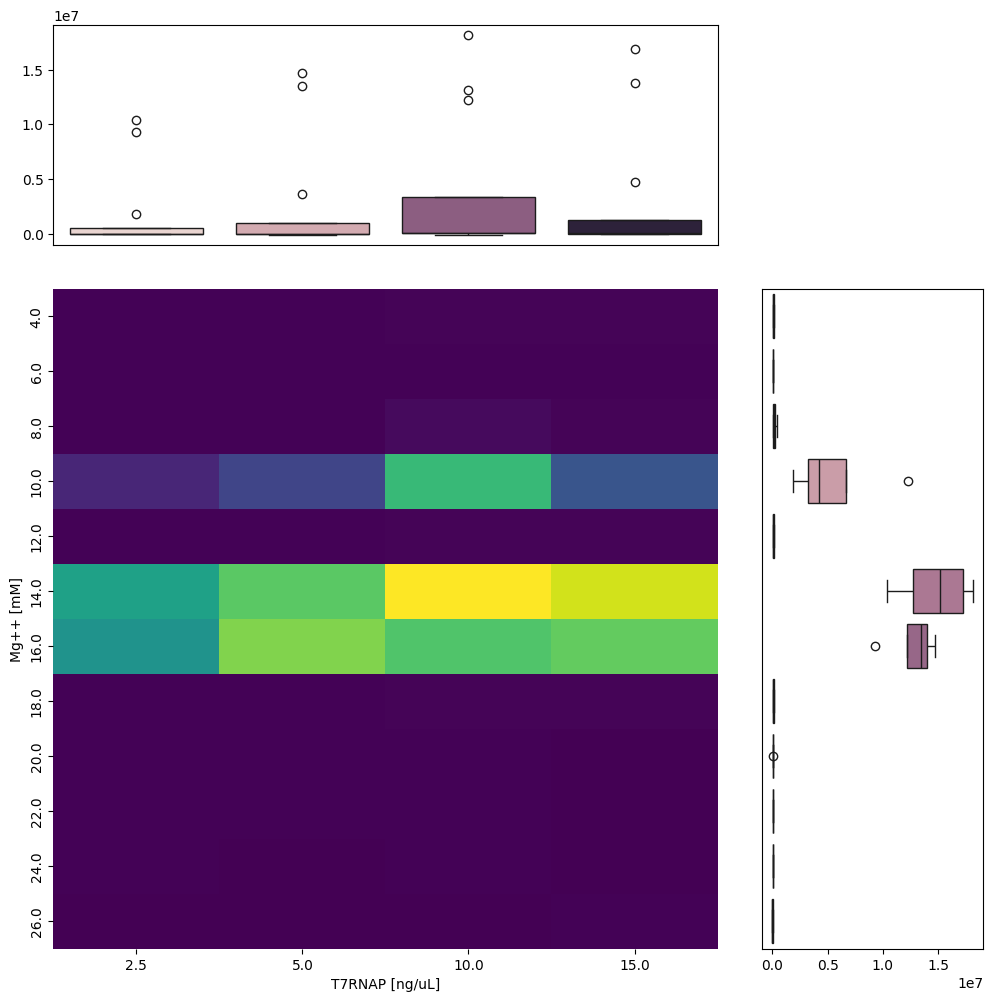

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12,12), width_ratios=[3,1], height_ratios=[1,3], gridspec_kw=dict(hspace=0.1, wspace=0.1))

discovery_ss = discovery[discovery.timepoint == 100]  # about at the peak fluorescence
t7_ss = discovery_ss[(discovery_ss["ribosome [uM]"] == 1.8) & (discovery_ss["row"].isin(list("ABCDEFGH")))]


ax = sns.heatmap(
    data=t7_ss.pivot(
        index="Mg++ [mM]", columns="T7RNAP [ng/uL]", 
        values="background_subtracted_fluorescence [AU]"
    ),
    cmap="viridis",
    cbar=False,
    square=False,
    ax=axes[1][0]
)

ax = sns.boxplot(
    data=t7_ss,
    x="T7RNAP [ng/uL]",
    y="background_subtracted_fluorescence [AU]",
    hue="T7RNAP [ng/uL]",
    legend=False,
    ax=axes[0][0]
)
ax.set_ylabel("")
ax.get_xaxis().set_visible(False)

ax = sns.boxplot(
    data=t7_ss,
    x="background_subtracted_fluorescence [AU]",
    y="Mg++ [mM]",
    hue="Mg++ [mM]",
    orient="h",
    legend=False,
    ax=axes[1][1]
)
ax.set_xlabel("")
ax.get_yaxis().set_visible(False)

axes[0][1].set_axis_off()

## Translation: [Ribosome] vs [Mg++]

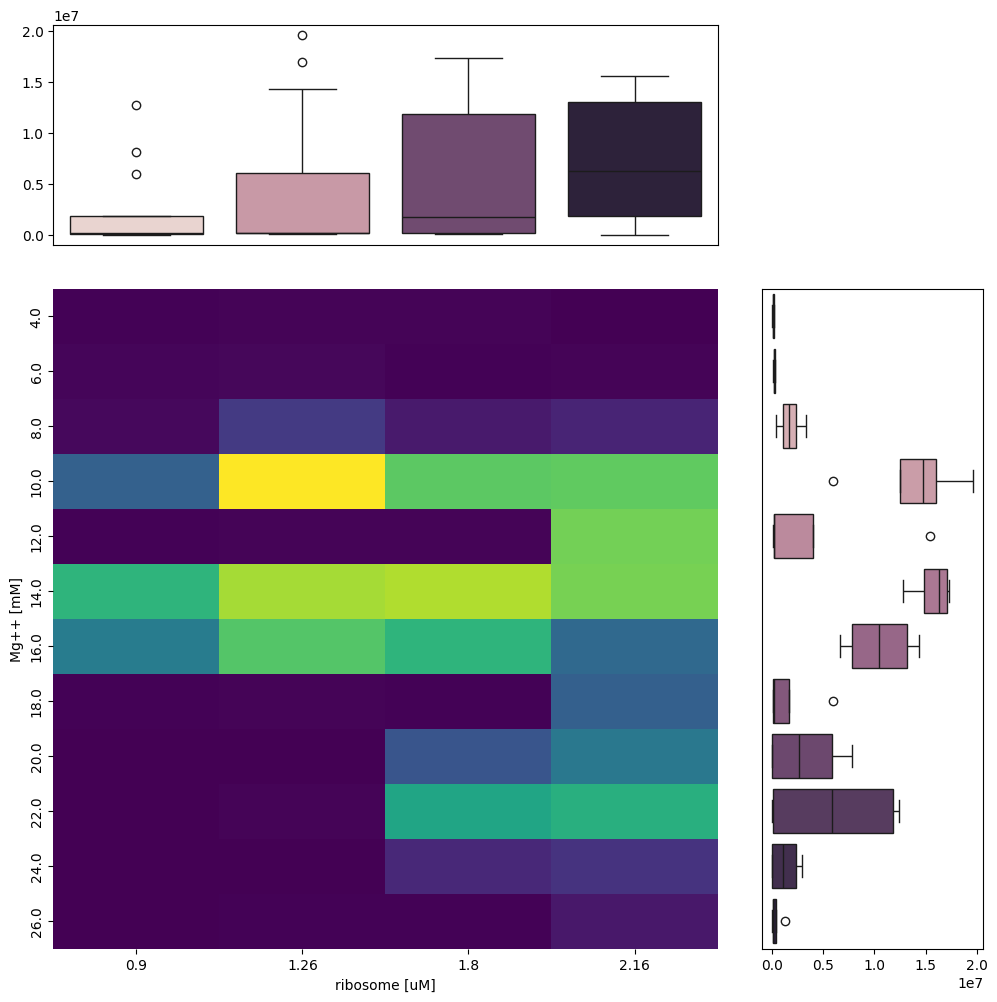

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12,12), width_ratios=[3,1], height_ratios=[1,3], gridspec_kw=dict(hspace=0.1, wspace=0.1))

discovery_ss = discovery[discovery.timepoint == 100]  # about at the peak fluorescence
ribo_ss = discovery_ss[(discovery_ss["T7RNAP [ng/uL]"] == 10) & (discovery_ss["row"].isin(list("IJKLMNOP")))]


ax = sns.heatmap(
    data=ribo_ss.pivot(
        index="Mg++ [mM]", columns="ribosome [uM]", 
        values="background_subtracted_fluorescence [AU]"
    ),
    cmap="viridis",
    cbar=False,
    square=False,
    ax=axes[1][0]
)

ax = sns.boxplot(
    data=ribo_ss,
    x="ribosome [uM]",
    y="background_subtracted_fluorescence [AU]",
    hue="ribosome [uM]",
    legend=False,
    ax=axes[0][0]
)
ax.set_ylabel("")
ax.get_xaxis().set_visible(False)

ax = sns.boxplot(
    data=ribo_ss,
    x="background_subtracted_fluorescence [AU]",
    y="Mg++ [mM]",
    hue="Mg++ [mM]",
    orient="h",
    legend=False,
    ax=axes[1][1]
)
ax.set_xlabel("")
ax.get_yaxis().set_visible(False)

axes[0][1].set_axis_off()